In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [5.0, 3.0]
plt.rcParams['figure.dpi'] = 150
%matplotlib notebook

In [16]:
true_data = pd.read_csv("csv_data/srilanka.txt",sep=' ', skipinitialspace=True, \
                        skiprows=1, header=None, names=['confirmed', 'recovered', 'deaths'])
true_data

,confirmed,recovered,deaths
0,3382,3233,13
1,3388,3245,13
2,3395,3254,13
3,3402,3258,13
4,3513,3259,13
...,...,...,...
331,421557,0,8583
332,426169,0,8775
333,436081,0,8991
334,440302,0,9185


In [17]:
smoothed_data = pd.read_csv("../C++/build/release/results/srilanka_popsmooth.txt", skipinitialspace=True, \
                            header=None, names=['confirmed_true', 'deaths_true', 'confirmed_smooth', 'deaths_smooth'])
diff_data = smoothed_data.diff();
diff_data.loc[0] = 0
smoothed_data

,confirmed_true,deaths_true,confirmed_smooth,deaths_smooth
0,3382,13,3382,13
1,3388,13,3388,13
2,3395,13,3416,13
3,3402,13,3684,13
4,3513,13,3842,13
...,...,...,...,...
331,421557,8583,423030,8573
332,426169,8775,428224,8780
333,436081,8991,433648,8987
334,440302,9185,440171,9192


<IPython.core.display.Javascript object>


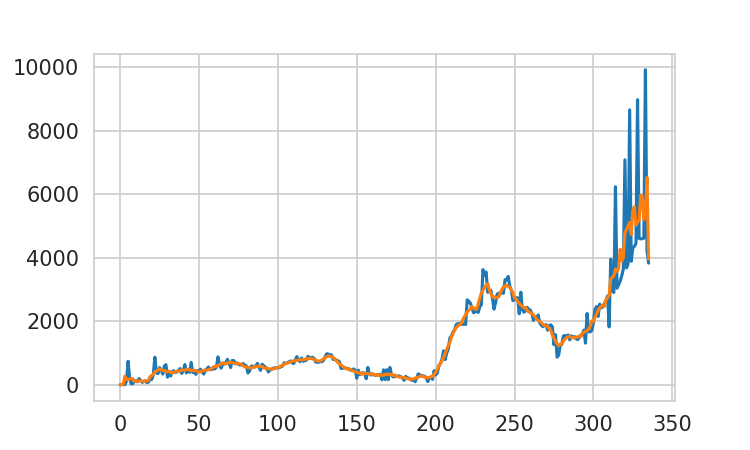

In [18]:
plt.figure()
plt.plot(diff_data['confirmed_true'])
plt.plot(diff_data['confirmed_smooth'])
plt.show()

<IPython.core.display.Javascript object>


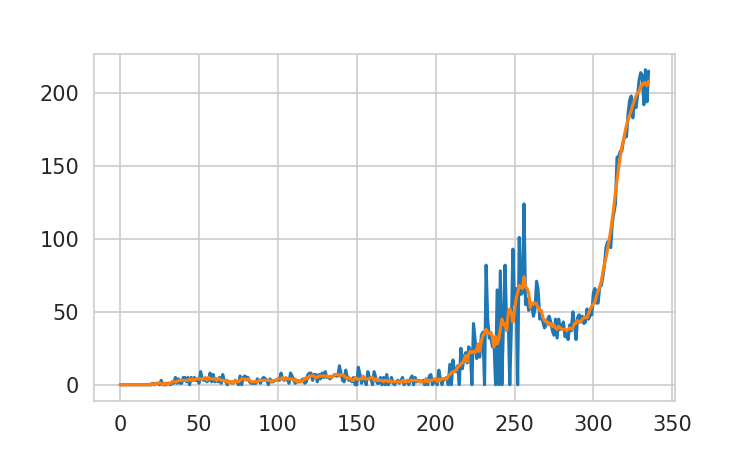

In [19]:
plt.figure()
plt.plot(diff_data['deaths_true'])
plt.plot(diff_data['deaths_smooth'])
plt.show()

In [31]:
pred_data = pd.read_csv("../C++/build/release/results/srilanka_prediction_seed1.txt", \
                        skipinitialspace=True)
print(pred_data)
num_days = len(pred_data)
print("Num days:", num_days)

param_data = pd.read_csv("../C++/build/release/results/srilanka_params_seed1.txt", \
                        skipinitialspace=True,header=None)
# param_data = param_data.iloc[:, ::-1];
# print(param_data)

beta = param_data.loc[0:num_days-1]
c0 = param_data.loc[  num_days:2*num_days-1]
c1 = param_data.loc[2*num_days:3*num_days-1]
c2 = param_data.loc[3*num_days:4*num_days-1]
c3 = param_data.loc[4*num_days:5*num_days-1]
IFR = param_data.loc[5*num_days:6*num_days-1]
# print(IFR)

num_sol_to_plot = min(10, len(param_data.columns));

error = param_data.loc[param_data.index[-1]]
error_plot = error[0:num_sol_to_plot]
print(error)

scaled_error = (error_plot - min(error_plot)) / (max(error_plot) - min(error_plot)) * 0.9
grey_colors = np.tile(scaled_error,[3,1]).transpose();

# grey_colormap = matplotlib.colors.ListedColormap(grey_colors)
grey_colors[0] = [0.24, 0.63, 0.93]
print(grey_colors)
# plt.figure()
# ax = sns.heatmap(np.random.rand(30,30))
# ax.pcolor(np.random.rand(30,30),cmap=grey_colormap)
# plt.show()

start_date = datetime.strptime("2020-10-1", "%Y-%m-%d")
dates = [];
for i in range(0,num_days):
    dates.append(start_date + timedelta(days=i))

locator = mdates.AutoDateLocator(minticks=4, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)

        TotalR0       TotalU0  RecoveredR0     FatalR0     InfectedU0  \
0      3382.000  0.000000e+00     3233.000    13.00000       0.000000   
1      3389.523  2.199494e+01     3250.118    13.00054       4.211806   
2      3401.855  3.575653e+01     3265.641    13.00409      10.614010   
3      3417.632  4.669927e+01     3280.379    13.01263      16.019150   
4      3436.334  5.728601e+01     3294.959    13.02728      20.396380   
..          ...           ...          ...         ...            ...   
331  421170.200  1.229292e+06   378406.300  8554.97400  229532.800000   
332  427002.100  1.271491e+06   383047.900  8787.58000  235600.400000   
333  432987.200  1.314695e+06   387817.900  9027.13300  241757.900000   
334  439127.700  1.358912e+06   392718.700  9273.75900  248002.200000   
335  445425.600  1.404150e+06   397752.500  9527.58800  254330.000000   

      RecoveredU0    FatalU0     Reff0     TotalR1       TotalU1  ...  \
0    0.000000e+00   0.000000  1.813627    3382.000

<IPython.core.display.Javascript object>


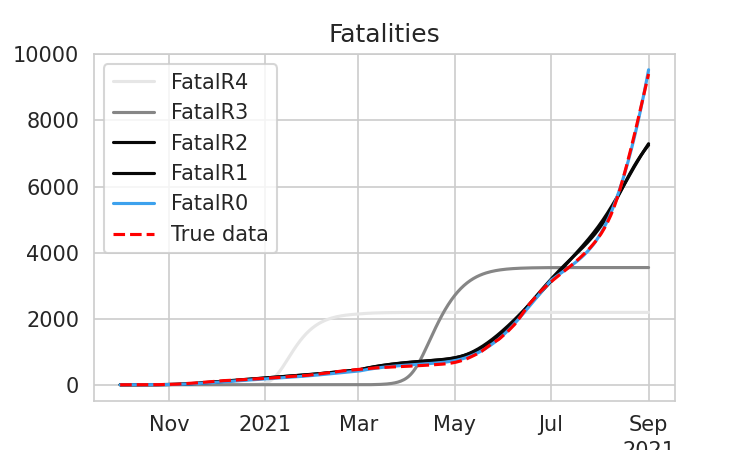

In [34]:
pred_fatal = pred_data.filter(regex=("FatalR.*"))

fig = plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates,pred_fatal["FatalR"+str(i)], color=grey_colors[i])
    
plt.plot(dates,smoothed_data["deaths_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
labels = pred_fatal.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Fatalities')
plt.show()


<IPython.core.display.Javascript object>


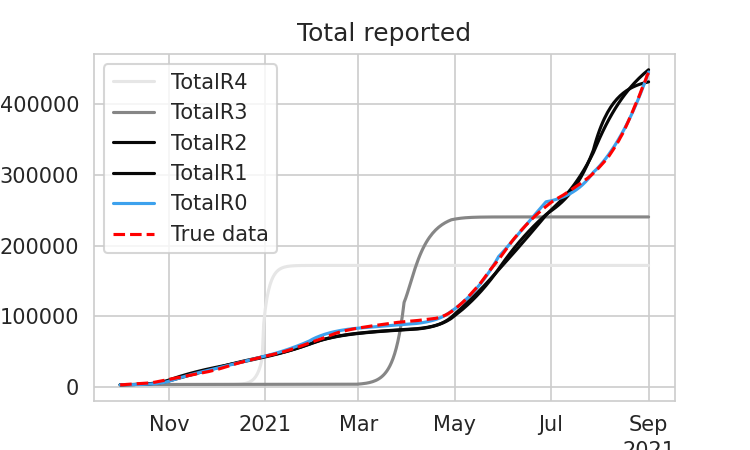

In [35]:
pred_reported = pred_data.filter(regex=("TotalR.*"))
# print(pred_reported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_reported["TotalR"+str(i)], color=grey_colors[i])

# plt.plot(pred_reported)
plt.plot(dates, smoothed_data["confirmed_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_reported.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Total reported')
plt.show()

<IPython.core.display.Javascript object>


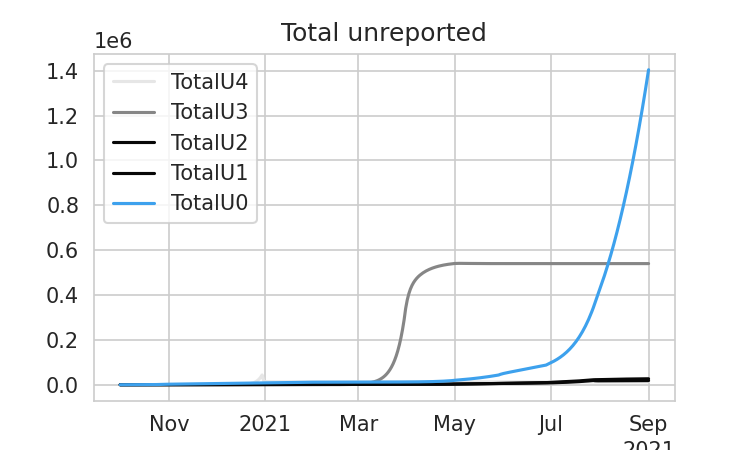

In [37]:
pred_unreported = pred_data.filter(regex=("TotalU.*"))
# print(pred_unreported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_unreported["TotalU"+str(i)], color=grey_colors[i])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_unreported.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(labels,loc='upper left')
plt.title('Total unreported')
plt.show()

        Reff0     Reff1     Reff2     Reff3     Reff4
0    1.813627  1.548546  1.510230  0.828317  0.443034
1    1.813626  1.548544  1.510229  0.828317  0.443034
2    1.813624  1.548541  1.510226  0.828316  0.443034
3    1.813621  1.548537  1.510223  0.828315  0.443034
4    1.813618  1.548534  1.510219  0.828314  0.443034
..        ...       ...       ...       ...       ...
331  1.250382  0.896532  0.754834  0.000000  1.932740
332  1.247085  0.896451  0.754817  0.000000  1.932740
333  1.243712  0.896373  0.754801  0.000000  1.932740
334  1.240263  0.896298  0.754786  0.000000  1.932740
335  1.236736  0.896224  0.754773  0.000000  1.932740

[336 rows x 5 columns]


<IPython.core.display.Javascript object>


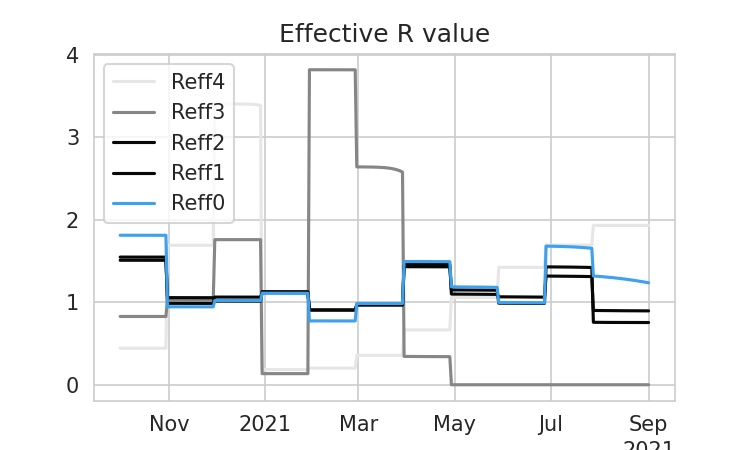

In [38]:
pred_Reff = pred_data.filter(regex=("Reff.*"))
print(pred_Reff)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_Reff["Reff"+str(i)], color=grey_colors[i])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_Reff.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(labels,loc='upper left')
plt.title('Effective R value')
plt.show()

<IPython.core.display.Javascript object>


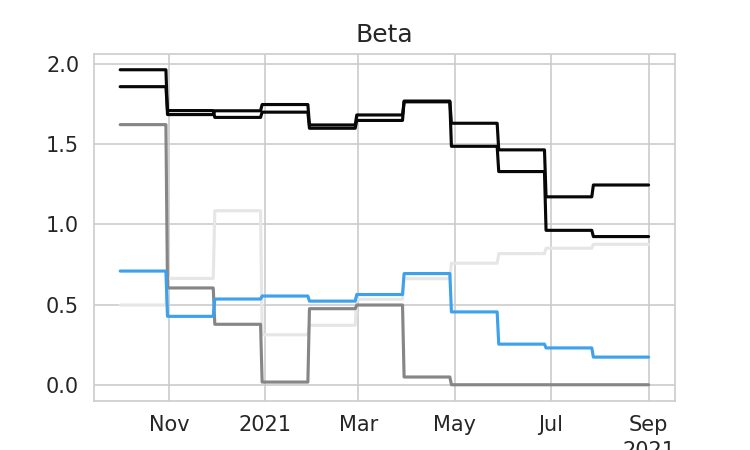

<IPython.core.display.Javascript object>


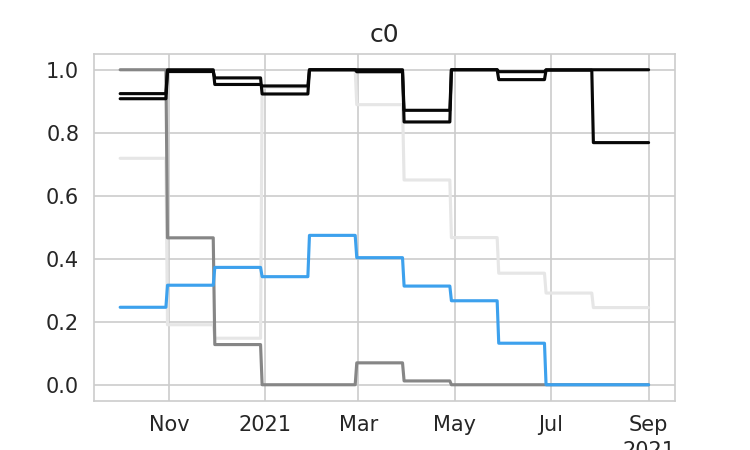

<IPython.core.display.Javascript object>


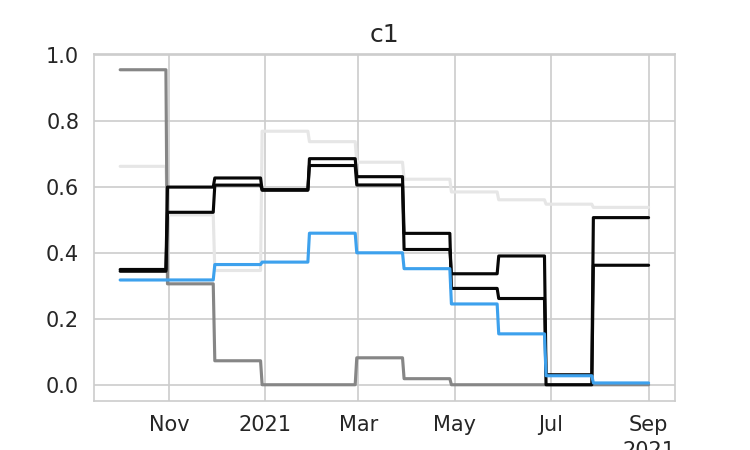

In [39]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, beta[i], color=grey_colors[i])
# sns.lineplot(data=beta,palette=grey_colormap, dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('Beta')
plt.show()

plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, c0[i], color=grey_colors[i])
# sns.lineplot(data=c0,palette="Greys_r", dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('c0')
plt.show()

plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, c1[i], color=grey_colors[i])
# sns.lineplot(data=c1,palette="ch:s=.25,rot=-.25,reverse=1", dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('c1')
plt.show()

# print(sns.color_palette("light:#5A9")[0])

<IPython.core.display.Javascript object>


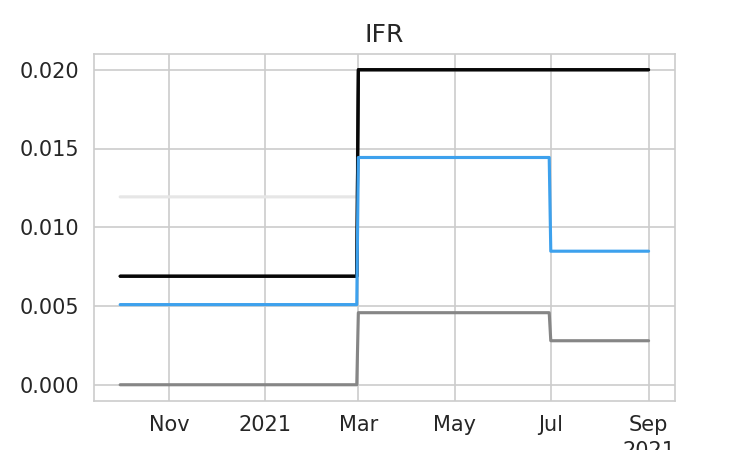

In [40]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, IFR[i], color=grey_colors[i])
# sns.lineplot(data=IFR,palette="ch:s=.25,rot=-.25,reverse=1", dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('IFR')
plt.show()